In [1]:
import cv2
import numpy as np
import matplotlib.pyplot  as plt

# Predict using the model
Requires an image to define the input layer of the network.

`image` stores the input image

`config/classes.txt` defines the classes that can be identified.

`config/yolov3.weights` defines the weights of the network. Download them at https://pjreddie.com/media/files/yolov3.weights

`config/yolov3.cfg` defines the structure of the netowrk matching the weights.

In [3]:
# read input image
image = cv2.imread('Images/test.jpg')

width = image.shape[1]
height = image.shape[0]
scale = 0.00392

# read class names from text file
classes = None
with open('config/classes.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# generate different colors for different classes 
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

# read pre-trained model and config file
net = cv2.dnn.readNet('config/yolov3.weights', "config/yolov3.cfg")

# create input blob 
blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

# set input blob for the network
net.setInput(blob)

In [4]:
# function to get the output layer names 
# in the architecture
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers

# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [5]:
# run inference through the network
# and gather predictions from output layers
outs = net.forward(get_output_layers(net))

# initialization
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

# for each detetion from each output layer 
# get the confidence, class id, bounding box params
# and ignore weak detections (confidence < 0.5)
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [6]:
# apply non-max suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# go through the detections remaining
# after nms and draw bounding box
for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    draw_bounding_box(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))



## Display the predictions using MatplotLib

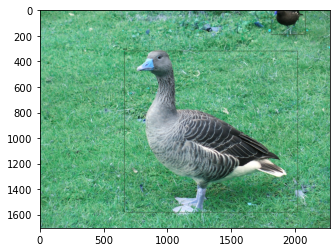

In [7]:
plt.imshow(image)

## Display the predictions using OpenCV

In [8]:
# display output image    
cv2.imshow("object detection", image)

# wait until any key is pressed
cv2.waitKey()
    
 # save output image to disk
cv2.imwrite("object-detection.jpg", image)

# release resources
cv2.destroyAllWindows()

# Extract subimages of interest

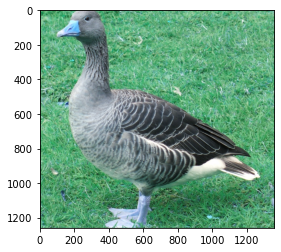

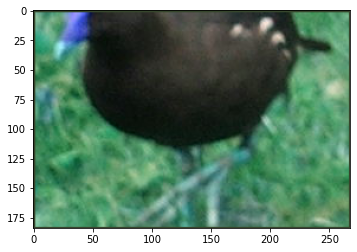

In [9]:
for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    if class_ids[i] == 14:
        plt.imshow(image[round(y):round(y+h), round(x):round(x+w)])
        plt.show()

# TODO: Run subimages on model2
The sub images are different species of birds. Model2 is able to distingish between geese and other types of birds.

In [47]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

# TODO: Load Training and Test data
Requires the input images of `goose` and `not goose` to train!

In [45]:
#goose_database = #tf.keras.datasets.goose_database

#(train_images, train_labels), (test_images, test_labels) = goose_database.load_data()

SyntaxError: unexpected EOF while parsing (<ipython-input-45-d39fac87330e>, line 4)

In [48]:
class_names = ['goose', 'not-goose']

In [49]:
train_images = train_images / 255.0

test_images = test_images / 255.0

NameError: name 'train_images' is not defined

NameError: name 'train_images' is not defined

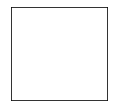

In [50]:
#display training data set image for goose and other birds
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Define Model2

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
    ])

NameError: name 'tf' is not defined

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

NameError: name 'model' is not defined

# Train Model2

In [53]:
model.fit(train_images, train_labels, epochs=10)

NameError: name 'model' is not defined

In [54]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

NameError: name 'model' is not defined

# Run Model2 on test images

In [57]:
predictions = probability_model.predict(test_images)
np.argmax(predictions[0])

NameError: name 'probability_model' is not defined